In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import sklearn
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Dataset exploration

In [4]:
data = pd.read_csv("group6_data.csv")
data.head()

,Unnamed: 0,x1,x2,x3,x4,Category
0,0,0.000345,0.152103,0.201556,1.529294,A
1,1,0.000837,0.426073,0.086737,1.487763,A
2,2,0.002193,1.379352,0.340120,0.619839,A
3,3,0.006689,1.457914,0.366887,0.377273,A
4,4,0.006799,0.602755,1.079031,0.061415,B


In [5]:
# we can drop the first column
df = data.drop(data.columns[0], axis=1)
df.head()

,x1,x2,x3,x4,Category
0,0.000345,0.152103,0.201556,1.529294,A
1,0.000837,0.426073,0.086737,1.487763,A
2,0.002193,1.379352,0.340120,0.619839,A
3,0.006689,1.457914,0.366887,0.377273,A
4,0.006799,0.602755,1.079031,0.061415,B


In [6]:
print( "dataframe shape:", df.shape)

dataframe shape: (610, 5)


In [7]:
print("\n",df.groupby(['Category']).size())


 Category
A    278
B    332
dtype: int64


In [8]:
# checking for missing values
df.isnull().sum()

x1          0
x2          0
x3          0
x4          0
Category    0
dtype: int64

The dataset has 610 rows, one ID column, 4 feature columns and 1 classification column. There are 2 categories (A and B) and no missing values at all.

In [40]:
# basic statistics for numeric columns
df.describe()

,x1,x2,x3,x4
count,610.000000,610.000000,610.000000,610.000000
mean,0.490394,0.465022,0.482275,0.494644
std,0.462243,0.458083,0.451245,0.459727
min,0.000345,0.001267,0.000999,0.000468
25%,0.133480,0.134640,0.138931,0.144470
50%,0.329266,0.284595,0.324339,0.331296
75%,0.700547,0.652158,0.673168,0.699368
max,1.548921,1.545714,1.546791,1.544768


In [47]:
# statistics for category A
print ("A")
df[df.Category == 'A'].describe()

A


,x1,x2,x3,x4
count,278.000000,278.000000,278.000000,278.000000
mean,0.538712,0.530810,0.545930,0.534637
std,0.561802,0.560337,0.554620,0.560315
min,0.000345,0.002039,0.001733,0.000468
25%,0.108714,0.122214,0.137370,0.124782
50%,0.289333,0.266986,0.267953,0.285396
75%,1.156510,1.090458,0.835966,0.815037
max,1.548921,1.545714,1.546791,1.544768


In [48]:
# and for B
print ("B")
df[df.Category == 'B'].describe()

B


,x1,x2,x3,x4
count,332.000000,332.000000,332.000000,332.000000
mean,0.449934,0.409936,0.428974,0.461156
std,0.354106,0.341535,0.333118,0.351647
min,0.006799,0.001267,0.000999,0.009591
25%,0.145428,0.145063,0.144083,0.164439
50%,0.384296,0.299043,0.367424,0.387520
75%,0.679054,0.637669,0.624942,0.696372
max,1.541478,1.468020,1.434479,1.491941


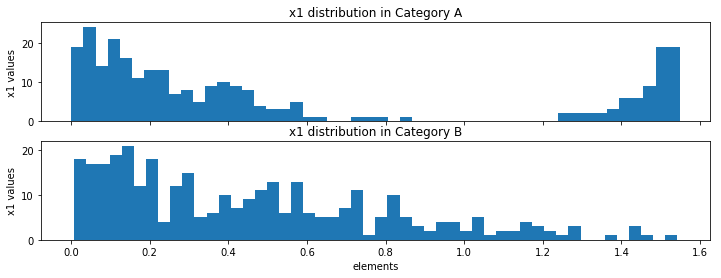

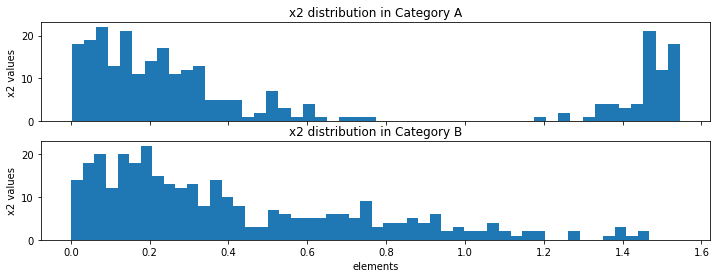

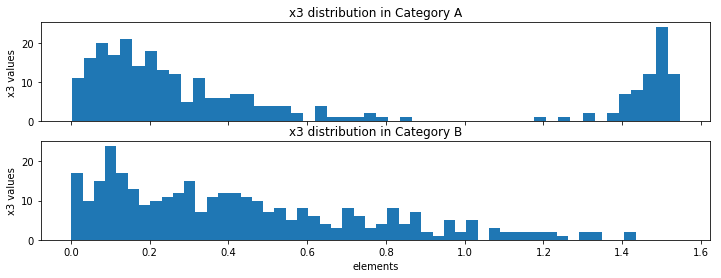

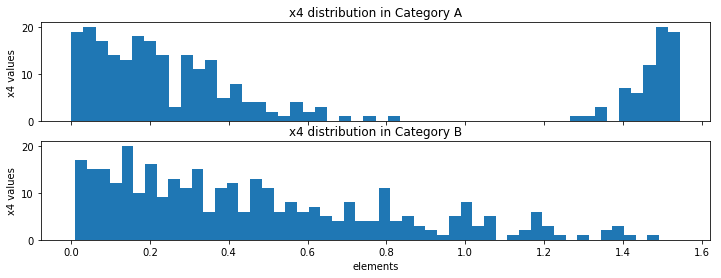

In [80]:
# the distributions of columns look very similar. Let's try to plot them.

bins = 50

for n, xi in enumerate(df.columns[0:4]):
    
    f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))
    
    ax1.hist(df[xi][df.Category == 'A'], bins = bins)
    ax1.set_title(str(xi)+' distribution in Category A')
    ax1.set_ylabel(str(xi) +' values')

    ax2.hist(df[xi][df.Category == 'B'], bins = bins)
    ax2.set_title(str(xi)+' distribution in Category B')
    ax2.set_ylabel(str(xi) +' values')

    plt.xlabel('elements')

    plt.show()

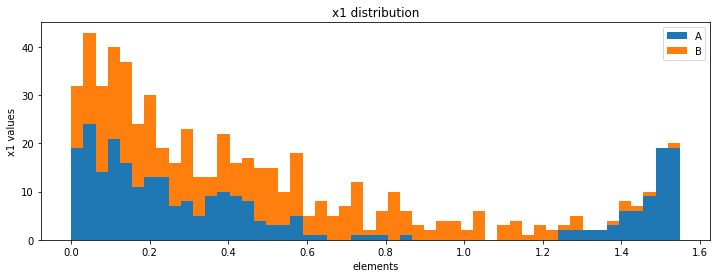

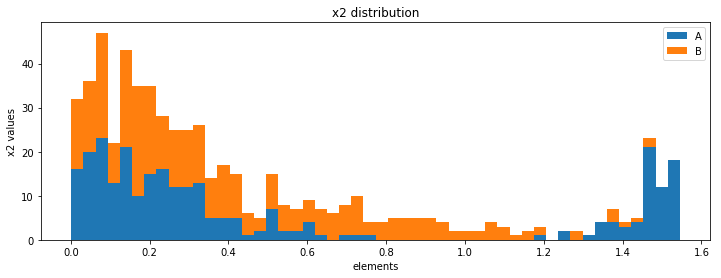

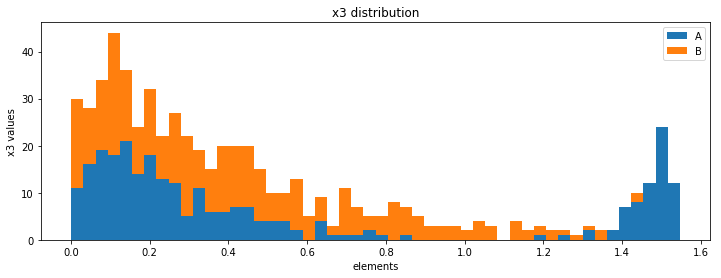

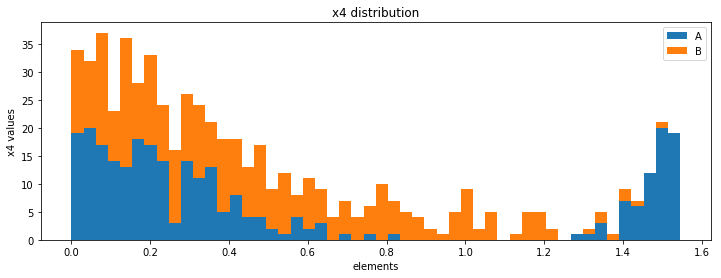

In [14]:
# the distributions of columns look very similar. Let's try to plot them.


bins = 50


for n, xi in enumerate(df.columns[0:4]):
    
    f, ax = plt.subplots(1, 1, sharex=True, figsize=(12,4))
    
    ax.hist([df[xi][df.Category == 'A'],df[xi][df.Category == 'B']], bins = bins, stacked=True)
    ax.set_title(str(xi)+' distribution')
    ax.set_ylabel(str(xi) +' values')
    ax.legend(('A','B'))
    
    plt.xlabel('elements')

    plt.show()

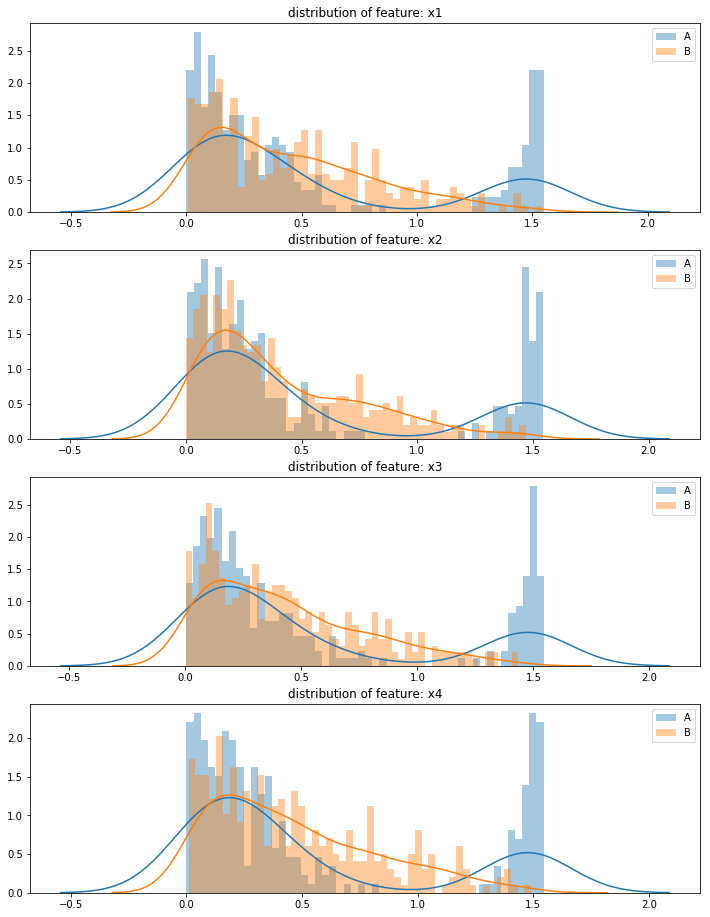

In [92]:
# better plot of the distribution of features in each category
plt.figure(figsize=(12,4*4))
gs = gridspec.GridSpec(4, 1)
for i, xi in enumerate(df.columns[0:4]):
    ax = plt.subplot(gs[i])
    sns.distplot(df[xi][df.Category == 'A'], bins=50)
    sns.distplot(df[xi][df.Category == 'B'], bins=50)
    ax.set_xlabel('')
    ax.set_title('distribution of feature: ' + str(xi))
    ax.legend(('A','B'))
plt.show()

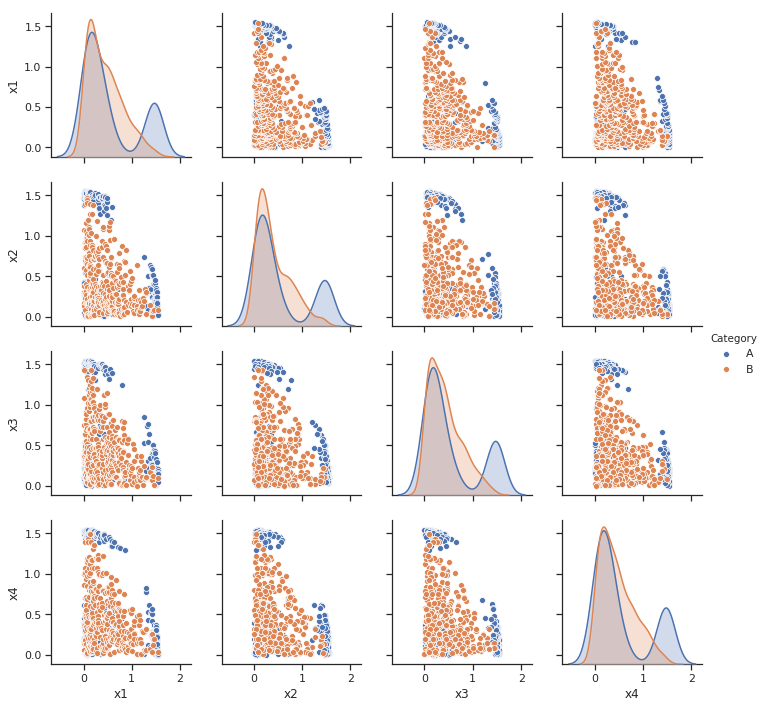

In [138]:
sns.set(style="ticks")
sns.pairplot(df, hue="Category")

### Normalized data

In [145]:
# what happens if we normalize the data?
values = df.drop(df.columns[4], axis=1).values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
scaled_values = min_max_scaler.fit_transform(values)
ndf = pd.DataFrame(scaled_values)

# add back the categories
categories = df['Category']
ndf['Category'] = categories

In [136]:
# normalized dataframe
ndf.head()

,0,1,2,3,Category
0,0.000000,0.097663,0.129744,0.989980,A
1,0.000318,0.275054,0.055465,0.963086,A
2,0.001193,0.892284,0.219383,0.401069,A
3,0.004097,0.943152,0.236699,0.243997,A
4,0.004167,0.389452,0.697398,0.039466,B


In [112]:
# basic statistics for numeric columns
ndf.describe()

,0,1,2,3
count,610.000000,610.000000,610.000000,610.000000
mean,0.316451,0.300273,0.311346,0.320000
std,0.298495,0.296600,0.291919,0.297693
min,0.000000,0.000000,0.000000,0.000000
25%,0.085972,0.086357,0.089230,0.093248
50%,0.212402,0.183450,0.209174,0.214225
75%,0.452158,0.421439,0.434838,0.452567
max,1.000000,1.000000,1.000000,1.000000


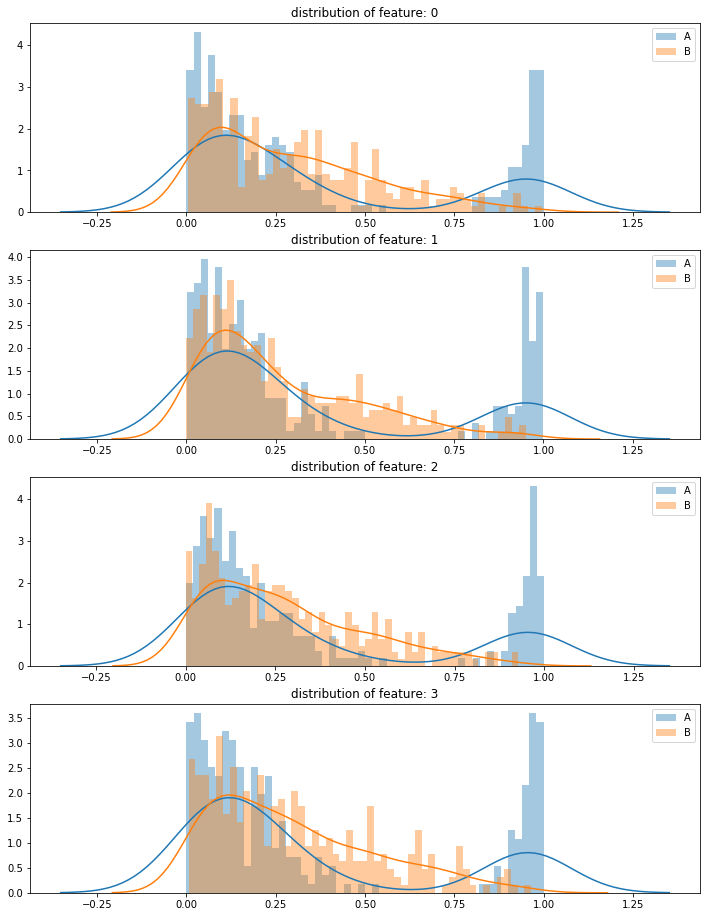

In [113]:
# better plot of the distribution of features in each category
plt.figure(figsize=(12,4*4))
gs = gridspec.GridSpec(4, 1)
for i, xi in enumerate(ndf.columns[0:4]):
    ax = plt.subplot(gs[i])
    sns.distplot(ndf[xi][df.Category == 'A'], bins=50)
    sns.distplot(ndf[xi][df.Category == 'B'], bins=50)
    ax.set_xlabel('')
    ax.set_title('distribution of feature: ' + str(xi))
    ax.legend(('A','B'))
plt.show()

Normalizing doesn't seem to give anything new.

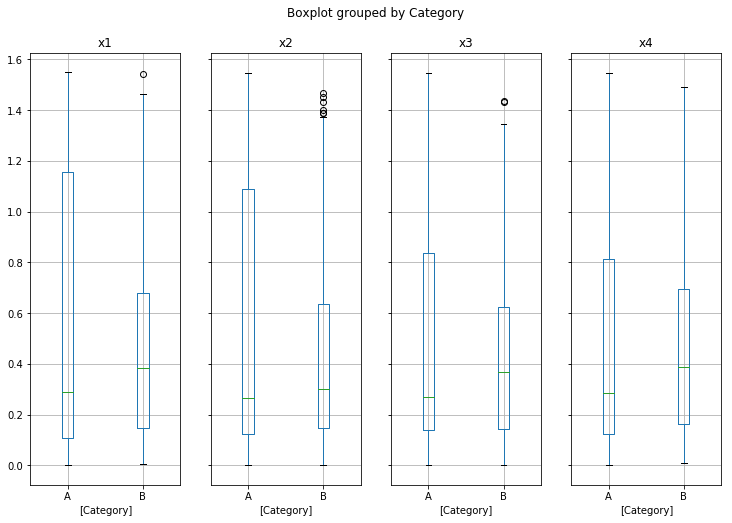

In [125]:
boxplot = df.boxplot(column=['x1', 'x2', 'x3', 'x4'], by=['Category'], figsize=(12,8), layout=(1,4))

## Transforming and combining features

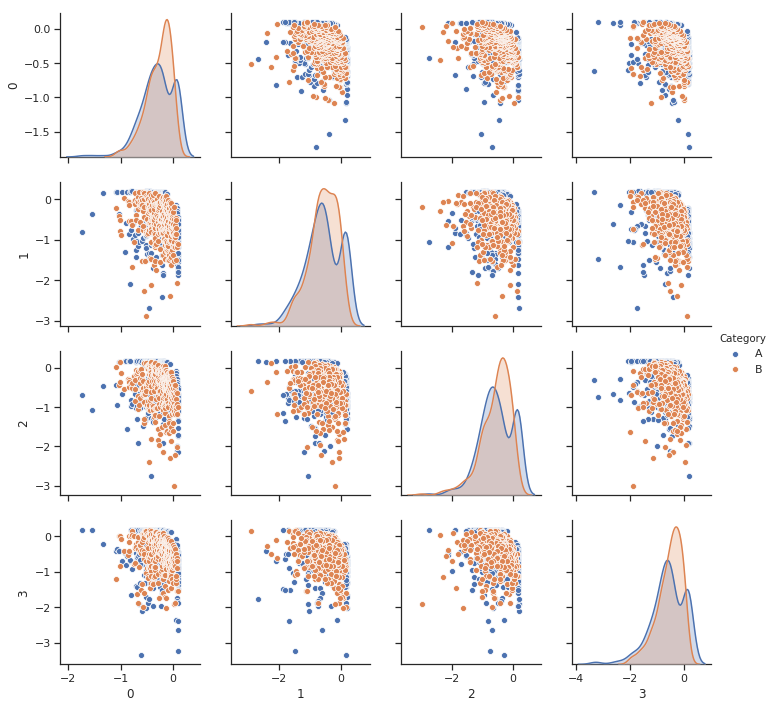

In [153]:
#sns.set(style="ticks")
df1 = pd.DataFrame(values).apply(np.log10)
df1['Category'] = categories
sns.pairplot(df1, hue="Category")

In [17]:
# Separating out the features
X = df.iloc[:,0:4].values

# Separating out the target
y = df.loc[:,['Category']].values

# Standardizing the features
X = StandardScaler().fit_transform(X)

In [16]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X)

princ_df = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])

In [17]:
princ_df.head()

,principal component 1,principal component 2,principal component 3
0,-0.287398,0.058199,1.376529
1,-0.480209,-0.530566,1.178240
2,-1.684716,-1.504890,-0.322905
3,-1.781228,-1.576072,-0.459649
4,-1.465353,0.843507,-0.282644


In [18]:
princ_df = pd.concat([princ_df, df[['Category']]], axis = 1)

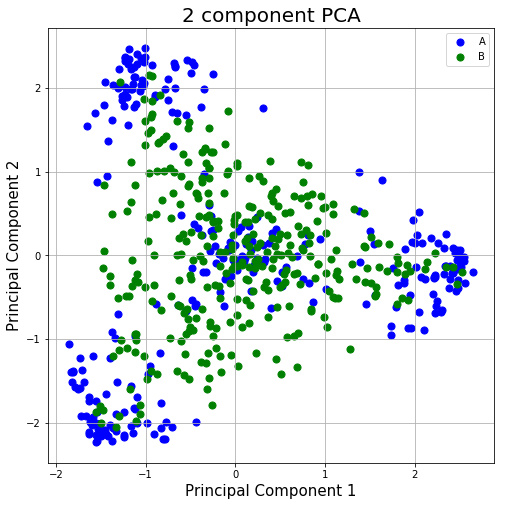

In [19]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['A','B']
colors = ['b', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = princ_df['Category'] == target
    ax.scatter(princ_df.loc[indicesToKeep, 'principal component 1']
               , princ_df.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [22]:
pca_explained_var = np.var(principalComponents, axis=0)
pca_explained_var_ratio = pca_explained_var / np.sum(pca_explained_var)
print(pca_explained_var_ratio)
print(np.cumsum(pca_explained_var_ratio))

[0.44713588 0.41944812 0.13341599]
[0.44713588 0.86658401 1.        ]


In [191]:
df['Category'].unique()

array(['A', 'B'], dtype=object)

IndexError: boolean index did not match indexed array along dimension 1; dimension is 4 but corresponding boolean dimension is 1

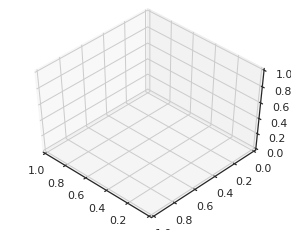

In [196]:
# https://stackoverflow.com/questions/49564844/3d-pca-in-matplotlib-how-to-add-legend

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np; np.random.seed(5)
from sklearn import decomposition, datasets 

#centers = [[1, 1], [-1, -1], [1, -1]]

fig = plt.figure(figsize=(5.5, 3))
ax = Axes3D(fig, rect=[0, 0, .7, 1], elev=48, azim=134)


for label in df['Category'].unique():
    ax.text3D(X[y == label].mean(),
              X[y == label].mean() + 1.5,
              X[y == label].mean(),
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
sc = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap="Spectral", edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

colors = [sc.cmap(sc.norm(i)) for i in [1, 2, 0]]
custom_lines = [plt.Line2D([],[], ls="", marker='.', 
                mec='k', mfc=c, mew=.1, ms=20) for c in colors]
ax.legend(custom_lines, [lt[0] for lt in labelTups], 
          loc='center left', bbox_to_anchor=(1.0, .5))

plt.show()

In [1]:
from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles

In [29]:
print(X.shape)

(610, 3)


In [30]:
np.random.seed(0)

# Separating out the features
X = df.iloc[:,0:3].values
# Separating out the target
y = df.loc[:,['Category']].values
# Standardizing the features
X = StandardScaler().fit_transform(X)

In [31]:
kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10)
X_kpca = kpca.fit_transform(X)
X_back = kpca.inverse_transform(X_kpca)
pca = PCA()
X_pca = pca.fit_transform(X)

In [38]:
reds = y == 'A'
reds[:5]

array([[ True],
       [ True],
       [ True],
       [ True],
       [False]])

IndexError: too many indices for array

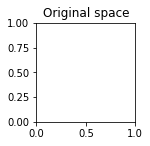

In [36]:
# Plot results

plt.figure()
plt.subplot(2, 2, 1, aspect='equal')
plt.title("Original space")
reds = y == 'A'
blues = y == 'B'

plt.scatter(X[reds, 0], X[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X[blues, 0], X[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

X1, X2 = np.meshgrid(np.linspace(-1.5, 1.5, 50), np.linspace(-1.5, 1.5, 50))
X_grid = np.array([np.ravel(X1), np.ravel(X2)]).T
# projection on the first principal component (in the phi space)
Z_grid = kpca.transform(X_grid)[:, 0].reshape(X1.shape)
plt.contour(X1, X2, Z_grid, colors='grey', linewidths=1, origin='lower')

plt.subplot(2, 2, 2, aspect='equal')
plt.scatter(X_pca[reds, 0], X_pca[reds, 1], c="A",
            s=20, edgecolor='k')
plt.scatter(X_pca[blues, 0], X_pca[blues, 1], c="B",
            s=20, edgecolor='k')
plt.title("Projection by PCA")
plt.xlabel("1st principal component")
plt.ylabel("2nd component")

plt.subplot(2, 2, 3, aspect='equal')
plt.scatter(X_kpca[reds, 0], X_kpca[reds, 1], c="A",
            s=20, edgecolor='k')
plt.scatter(X_kpca[blues, 0], X_kpca[blues, 1], c="B",
            s=20, edgecolor='k')
plt.title("Projection by KPCA")
plt.xlabel("1st principal component in space induced by $\phi$")
plt.ylabel("2nd component")

plt.subplot(2, 2, 4, aspect='equal')
plt.scatter(X_back[reds, 0], X_back[reds, 1], c="A",
            s=20, edgecolor='k')
plt.scatter(X_back[blues, 0], X_back[blues, 1], c="B",
            s=20, edgecolor='k')
plt.title("Original space after inverse transform")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

#plt.subplots_adjust(0.02, 0.10, 0.98, 0.94, 0.04, 0.35)

plt.show()